In [4]:
! gdown 1flhzM1YoKb-EzplqFPQuWEqnUVh5jGeX

Downloading...
From: https://drive.google.com/uc?id=1flhzM1YoKb-EzplqFPQuWEqnUVh5jGeX
To: /content/used_cars_UK_human_learning.zip
100% 1.15M/1.15M [00:00<00:00, 129MB/s]


https://drive.google.com/file/d/1flhzM1YoKb-EzplqFPQuWEqnUVh5jGeX/view?usp=sharing

In [5]:
! unzip /content/used_cars_UK_human_learning.zip -d /content/uk_cars

Archive:  /content/used_cars_UK_human_learning.zip
  inflating: /content/uk_cars/audi.csv  
  inflating: /content/uk_cars/bmw.csv  
  inflating: /content/uk_cars/cclass.csv  
  inflating: /content/uk_cars/focus.csv  
  inflating: /content/uk_cars/ford.csv  
  inflating: /content/uk_cars/hyundi.csv  
  inflating: /content/uk_cars/merc.csv  
  inflating: /content/uk_cars/skoda.csv  
  inflating: /content/uk_cars/toyota.csv  
  inflating: /content/uk_cars/unclean cclass.csv  
  inflating: /content/uk_cars/unclean focus.csv  
  inflating: /content/uk_cars/vauxhall.csv  
  inflating: /content/uk_cars/vw.csv  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/uk_cars/skoda.csv')

In [6]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5
...,...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,30,56.5,1.4
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0


<AxesSubplot:>

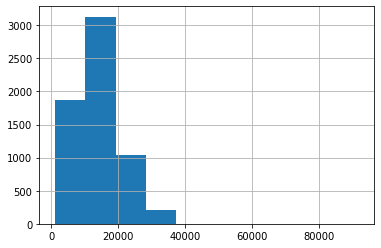

In [7]:
df['price'].hist()

<AxesSubplot:xlabel='price', ylabel='Probability'>

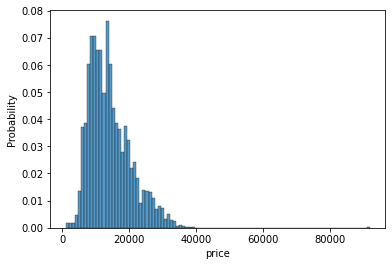

In [8]:
sns.histplot(df['price'],stat="probability") # вероятности, площадь равна 1

In [12]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [14]:
import matplotlib
matplotlib.style.use('seaborn')

<AxesSubplot:xlabel='price', ylabel='Density'>

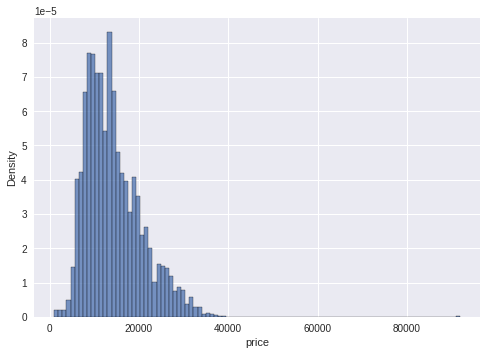

In [53]:
sns.histplot(df['price'], stat="density") # нормализация

<AxesSubplot:xlabel='price', ylabel='Density'>

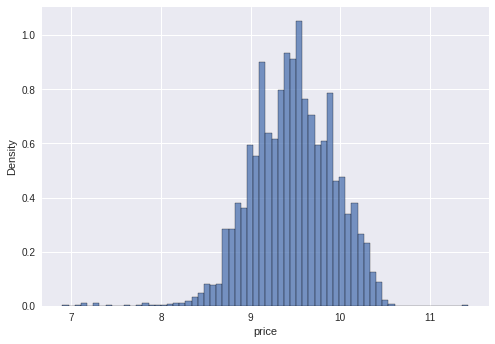

In [52]:
sns.histplot(np.log(df['price']),stat="density")

все значения от 0 до 1 логарифм делает отрицательными, чем ближе к 0, тем больше отрицательные значения по модулю. Большие значения при этом сильно уменьшает. А что делать, если логнормальное распределение начинается не с 0 (np.log(0) это неопределенность)? **Свдинуть:**

In [17]:
df['price'].min()

995

<AxesSubplot:xlabel='price', ylabel='Density'>

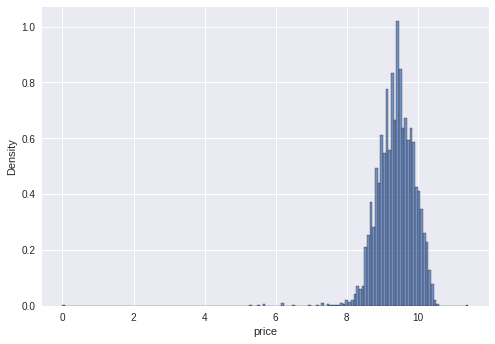

In [51]:
# в stat есть несколько вариантов
sns.histplot(np.log(df['price']-994), stat="density")

<AxesSubplot:xlabel='price', ylabel='Count'>

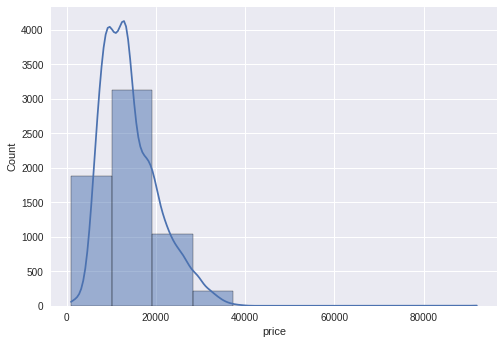

In [24]:
sns.histplot(df['price'], kde=True, bins=10)

Линия **kde** это ядерная оценка плотности. Оценка - когда по данным пытаемся найти теоретическую хар-ку случайной величины. Например, среднее арифметическое это оценка мат. ожидания.

Гистограмму всегда хочется улучшить - уголки мешают восприятию,хочется сгладить. Как можно улучшить?

Столбцы состоят из кирпичей - наших наблюдений, каждый кирпич это **1 / (n * |дельта i|)**. Соотвественно, формула для всего распределения (вероятностная) **h1 = ni / (n * |дельта i|)**. То есть если мы в столбец добавим одно наблюдение, то его высота увеличится на **1 / (n * |дельта i|)**. А если наблюдение почти на краю интервала нашего столбика? Это не гармонично, поэтому первое, что надо сделать - кирпич должен находится в центре столбика. Но изломы будут все равно.

Можно избавится от кирпичей, а сделать каждое наблюдение бугорком (по форме как колокол). Когда складываются эти бугорки, то это и есть **ядерная оценка плотности**:

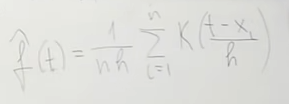

где
- **К** - гладкая лииня, 
- **t-xi** это сдвиг, чтобы расположить гладкую линию точно над наблюдением
- **h** - ширина окна, размазывает нашу линию. Если h большое, то функция будет менее восприимчивой к данным, если меньше, то будут всякие возможные бугорки

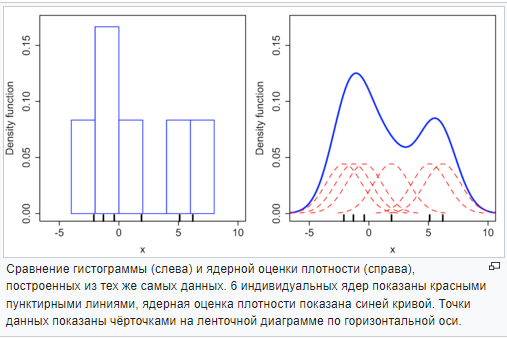

По факту kde это обощение гистограммы, дублирование информации, она особо не нужна.

In [32]:
from scipy.stats import gaussian_kde
from numpy import linspace, hstack
from pylab import plot, show, hist

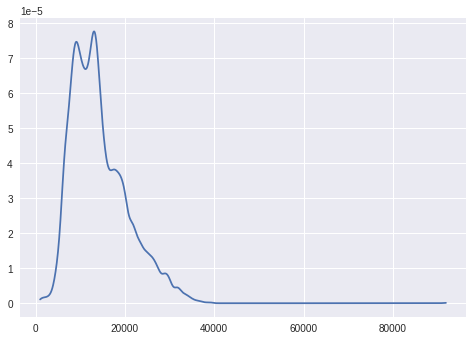

In [39]:
# density = gaussian_kde(df['price'])
density = gaussian_kde(df['price'], bw_method = 0.1) 
# bw_method это как раз h, если его менять, то и меняется ядерная плотность

# график
x = linspace(min(df['price']), max(df['price']), 1000)
plot(x, density(x))

По умолчанию h выбирается автоматически плохо, так как в питоне приведена не самая удачная формула Скотта Сильвермана для нахождения h из того, что распределение изначально берется как нормальное (что редко когда бывает). 

In [40]:
df['model'].value_counts()

 Fabia           1571
 Octavia         1477
 Superb           791
 Kodiaq           472
 Citigo           470
 Yeti Outdoor     458
 Karoq            390
 Scala            192
 Rapid            152
 Kamiq            141
 Yeti             136
 Roomster          17
Name: model, dtype: int64

model
 Citigo          AxesSubplot(0.125,0.125;0.775x0.755)
 Fabia           AxesSubplot(0.125,0.125;0.775x0.755)
 Kamiq           AxesSubplot(0.125,0.125;0.775x0.755)
 Karoq           AxesSubplot(0.125,0.125;0.775x0.755)
 Kodiaq          AxesSubplot(0.125,0.125;0.775x0.755)
 Octavia         AxesSubplot(0.125,0.125;0.775x0.755)
 Rapid           AxesSubplot(0.125,0.125;0.775x0.755)
 Roomster        AxesSubplot(0.125,0.125;0.775x0.755)
 Scala           AxesSubplot(0.125,0.125;0.775x0.755)
 Superb          AxesSubplot(0.125,0.125;0.775x0.755)
 Yeti            AxesSubplot(0.125,0.125;0.775x0.755)
 Yeti Outdoor    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

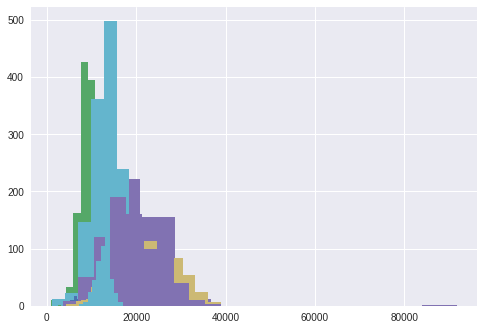

In [41]:
# так как число машин разное, то нужна нормализация
df.groupby('model')['price'].hist() # так делать неправильно

<AxesSubplot:xlabel='price', ylabel='Density'>

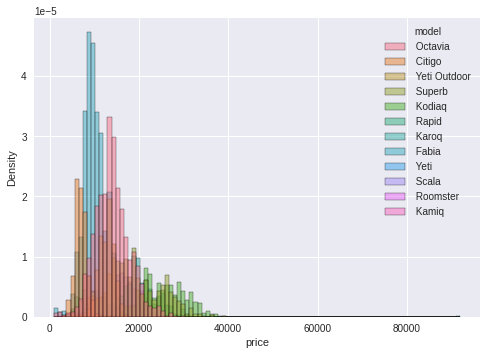

In [46]:
sns.histplot(df, x='price', hue='model', stat="density") # так правильно

Выводы: гистограмма хороша, когда их не больше 2. Иначе будет как выше - ничего непонятно. Также нужна нормализация. Лучше использовать боксплоты для сравнения нескольких распределений.

<AxesSubplot:xlabel='model', ylabel='price'>

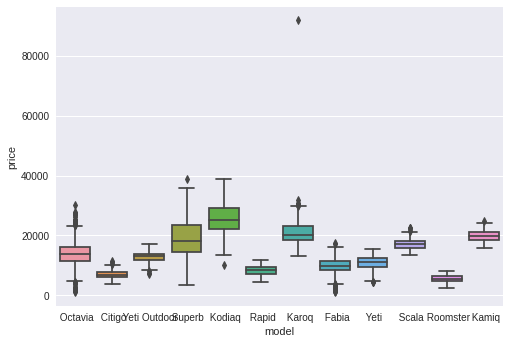

In [50]:
sns.boxplot(data = df, x='model', y='price')